# Machine Learning - Technical Assignment 1

**Name:**       Alexandre Frantz

**Student ID:** 0170616914

**Date of last edit:**       22.10.2022

## Environment setup and package instalation

Main References: 
- https://www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey
- https://www.kaggle.com/code/ziadhamadafathy/classification-using-some-types-models

In [348]:
!python -m venv sklearn-venv
!sklearn-venv\Scripts\activate
!pip install -U numpy
!pip install -U scikit-learn
!pip install -U pandas
!pip install matplotlib
!pip install seaborn
!pip install tensorflow
!pip install plotly

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.4
    Uninstalling numpy-1.23.4:
      Successfully uninstalled numpy-1.23.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\alexa\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\~0mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



### Check overall instalation

In [349]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.1.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\alexa\appdata\local\programs\python\python38\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: scispacy


In [350]:
!python -c "import sklearn; sklearn.show_versions()"


System:
    python: 3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:57:54) [MSC v.1924 64 bit (AMD64)]
executable: c:\Users\alexa\AppData\Local\Programs\Python\Python38\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
      sklearn: 1.1.2
          pip: 22.3
   setuptools: 47.1.0
        numpy: 1.19.5
        scipy: 1.5.2
       Cython: 0.29.14
       pandas: 1.5.1
   matplotlib: 3.5.0
       joblib: 1.2.0
threadpoolctl: 2.1.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\alexa\AppData\Local\Programs\Python\Python38\Lib\site-packages\sklearn\.libs\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 16

       filepath: C:\Users\alexa\AppData\Local\Programs\Python\Python38\Lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
         prefix: libopenblas
       user_api: blas
   internal_api: openblas
        version: 0.3.13
    

## Assignment Source Code

### Data Exploration and Preprocessing

Import necessary packages/libraries

In [351]:
import numpy as np
import pandas as pd
import sklearn
import scipy.stats as st
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

Data Preprocessing

In [352]:
dataset = pd.read_csv("dataset.csv")

In [353]:
dataset.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [354]:
dataset.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


Check the dataset columns to understand what type of information is included. Here we see a total of 18 columns which are the following:

['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid']

From this we can see that that _class_ column contains the type of observation (either START, GALAXY or QUAZAR) that is infered. For out training, we will need our models to predict the type of class for a given input

In [355]:
# Get the column names of the dataset
print("Dataset Columns: ", dataset.columns , "\n")

# Get the dimensions of the dataset in (rows, columns)
print("Dataset Dimensions: " ,dataset.shape)

Dataset Columns:  Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object') 

Dataset Dimensions:  (10000, 18)


A quick look at the dataset description from Kaggle found [here](https://www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey), allows us to determine some columns that are not usefull to us. These columns are the following:

- objid: The object Identifier
- run: Run number
- rerun: Rerun Number
- camcol: Camera Column
- field: Field Number
- plate: Plate Number
- fiberid: fiber ID
- spaceobjid: The ID of the spaceobject
- mjd: The MJD of the observation

We can therefore remove these columns entirely from the dataset, given that they are only usefull for indexing purposes and not for training in our case. For now, we will keep the rest but we remain open to further excluding columns from the dataset.

In [356]:
dataset.drop(columns=['objid', 'run', 'rerun', 'camcol', 'field', 'plate', 'fiberid', 'specobjid', 'mjd'],inplace=True)

Get some information on the dataset and check for potential outliers. This first look doesn't give us much information, the values remain consistent overall so to double check let's plot some of the entries to visually check for outliers

In [357]:
dataset.describe()

,ra,dec,u,g,r,i,z,redshift
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.143726
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.388774
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000081
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,0.042591
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,0.092579
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854


Now we can further check whether our dataset contains any empty values:

In [358]:
print(dataset.isnull().sum())
print(dataset.dtypes)

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
dtype: int64
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
class        object
redshift    float64
dtype: object


Plotting to check for outliers in our remaining columns:

Case 1: Redshift 

In [359]:
px.scatter(dataset,x='redshift', y='class').show()


Case 2: u field

In [360]:
px.scatter(dataset,x='u', y='class').show()

Case 3: g field

In [361]:
px.scatter(dataset,x='g', y='class').show()

Case 4: r field

In [362]:
px.scatter(dataset,x='r', y='class').show()

Case 5: i field

In [363]:
px.scatter(dataset,x='i', y='class').show()

Case 6: z field

In [364]:
px.scatter(dataset,x='z', y='class').show()

Following the information shown in Cases 1-6, we can conclude that there are indeed several outliers that we must reject before training our model. To do this, we will simply delete entries that fall under a certain value for each column that we inspected.

We define the following conditions:

- For u field: Remove any entry that has a value below 14.0
- For g field: Remove any entry that has a value below 13.0
- For r field: Remove any entry that has a value above 20.5
- For i field: Remove any entry that has a value above 21.0
- For z field: Remove any entry that has a value above 21.0 
- For redshift: Remove any entry that has a value above 3.1

In [365]:
print("Dataset Size before outlier removal: ", dataset.shape)
dataset.drop(dataset[dataset['u']<=14.0].index,inplace=True)
dataset.drop(dataset[dataset['g']<=13.0].index,inplace=True)
dataset.drop(dataset[dataset['r']>=20.5].index,inplace=True)
dataset.drop(dataset[dataset['i']>=21.0].index,inplace=True)
dataset.drop(dataset[dataset['z']>=21.0].index,inplace=True)
dataset.drop(dataset[dataset['redshift']>=3.1].index,inplace=True)
print("Dataset Size after outlier removal: ", dataset.shape)

Dataset Size before outlier removal:  (10000, 9)
Dataset Size after outlier removal:  (9987, 9)


We can see that we have removed a total of 13 outliers from the dataset. A small number than usual but still a possible improvement nontheless. Let us now check the distribution of our the _class_ column :

<AxesSubplot:>

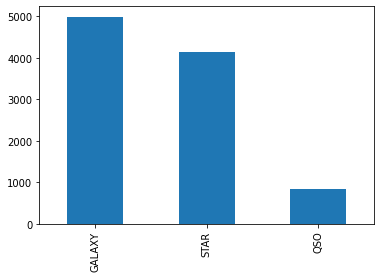

In [366]:
dataset['class'].value_counts().plot.bar()

From this we can see that we have an uneven distrubution of Galaxies, Stars and Quazars. For training purposes, one would ideally require an even distribution among all classes such that the model can have equal information on all of them. To fix this, we could simply randomly remove entries from the Galaxy and Start classes to match the amount of Quazars we have. However we will not be doing this due to the fact that the dataset is already quite small and we need all the information we can get. The result of this will however limit our model in classifying Quazars when given unseen data, and will be more qualified in classying Galaxies and Stars instead.

One final step before we split our data into training and testing sets, is to relabel the class values to integers. Our models cannot understand strings, therefore we will relabel our classes as follows:

- Galaxy --> 0
- Start --> 1
- QSO --> 2

In [367]:
# Convert Dataset into Pandas Dataframe
df = pd.DataFrame(dataset)

print("df class entries before relabeling: ")
print(df['class'].value_counts())
# Replace celestial body class with:
# 0: GALAXY
# 1: STAR
# 2: QSO
df['class'] = df['class'].replace(to_replace='GALAXY' , value=0)

df['class'] = df['class'].replace(to_replace='STAR' , value=1)

df['class'] = df['class'].replace(to_replace='QSO' , value=2)

print("df class after before relabeling: ")
print(df['class'].value_counts())


df class entries before relabeling: 
GALAXY    4995
STAR      4146
QSO        846
Name: class, dtype: int64
df class after before relabeling: 
0    4995
1    4146
2     846
Name: class, dtype: int64


Spliting dataset into training and testing subsets

In [434]:
from sklearn.preprocessing import MinMaxScaler


x = df.drop(labels='class', axis=1)
y = df['class']

(X_train, X_test, y_train, y_test) = ms.train_test_split(x, y, test_size=.05, random_state=0) 

print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(7490, 8)
(2497, 8)
(7490,)
(2497,)


### Random Forest Classifier Approach

Imports


In [369]:
import sklearn.linear_model as lm
import sklearn.model_selection as ms

Random Forest Classifier

In [370]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators = 100) 

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print('RandomForestClassifierModel Train Score is : ' , clf.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , clf.score(X_test, y_test))


ACCURACY OF THE MODEL:  0.9844844844844844
RandomForestClassifierModel Train Score is :  0.9998748278883465
RandomForestClassifierModel Test Score is :  0.9844844844844844


Confusion Matrix

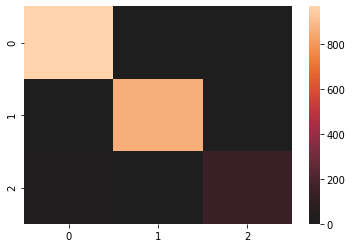

Confusion Matrix is
 [[966   9   6]
 [  1 854   0]
 [ 15   0 147]]


In [371]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_RF = clf.predict(X_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)



Cross validation of the model

In [372]:
ms.cross_val_score(clf, x, y, cv=5)

array([0.98998999, 0.99199199, 0.99248873, 0.98347521, 0.98898348])

### Simple Neural Newtork Approach

Imports and set the Tensorflow env. random seed for reproducability

In [417]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

tf.random.set_seed(1)

TensorFlow version: 2.4.1


Define NN model architecture

In [435]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)#tf.keras.optimizers.Adam(learning_rate=0.001)

early_stop_cb =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

print("Input Shape:", X_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(8,)),
  #tf.keras.layers.Dense(120, activation='relu'),
  #tf.keras.layers.Dense(60, activation='relu'),
  #tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer=opt,
              loss=loss_fn,
              metrics=['accuracy'])

model.summary()

Input Shape: (7490, 8)
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_78 (Flatten)         (None, 8)                 0         
_________________________________________________________________
dense_280 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_281 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_282 (Dense)            (None, 4)                 68        
Total params: 484
Trainable params: 484
Non-trainable params: 0
_________________________________________________________________


Model Training

In [436]:
history = model.fit(X_train, y_train, epochs=100, validation_split=.05, callbacks=[early_stop_cb], batch_size=64)


model.evaluate(X_test,  y_test, verbose=2)

c:\Users\alexa\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py:1385: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



Epoch 1/100
94/94 [==============================] - 1s 6ms/step - loss: 40.4555 - accuracy: 0.3433 - val_loss: 2.1430 - val_accuracy: 0.4272
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 1.7275 - accuracy: 0.4540 - val_loss: 0.9951 - val_accuracy: 0.3992
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.9901 - accuracy: 0.4018 - val_loss: 0.9883 - val_accuracy: 0.5013
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.9543 - accuracy: 0.4341 - val_loss: 0.9359 - val_accuracy: 0.3838
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.9398 - accuracy: 0.3907 - val_loss: 0.9430 - val_accuracy: 0.5100
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.9232 - accuracy: 0.4237 - val_loss: 0.9069 - val_accuracy: 0.4326
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.9178 - accuracy: 0.4116 - val_loss: 0.9021 - val_accuracy: 0.3872
Epoch 8/100


[0.3015759587287903, 0.8950740694999695]

Training History and Graphical Analysis

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


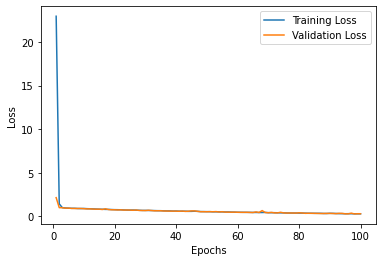

In [437]:
print(history.history.keys())
loss_values = history.history['loss']
accuracy_values = history.history['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, accuracy_values,  label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

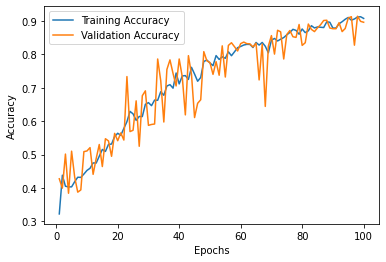

In [438]:
training_accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, training_accuracy_values, label='Training Accuracy')
plt.plot(epochs, val_accuracy_values,  label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Model Predict on test input

In [440]:
model.predict(X_test[:1])

array([[0.27429262, 0.7217707 , 0.00393679, 0.        ]], dtype=float32)

### Conclusions